In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in csv

#paths = './predict-west-nile-virus/train.csv/train.csv'


path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
train = pd.read_csv(path)
#pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None



In [6]:
type(train)
train.dtypes #confirm data types
train.isnull().sum() #confirm no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
train.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
train.Partner.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.Dependents.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.PhoneService.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.MultipleLines.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.OnlineSecurity.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.OnlineBackup.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.DeviceProtection.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.TechSupport.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.StreamingTV.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.PaperlessBilling.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.StreamingMovies.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.gender.replace(('Male', 'Female'), (1, 0), inplace=True)

#Creating binary columns so I can count the number of services a customer uses
train["InternetServiceBinary"] = np.where(train['InternetService'] == "No",0,1)
train["PhoneServiceBinary"] = np.where(train['PhoneService'] == 1,1,0)
train["OnlineSecurityBinary"] = np.where(train['OnlineSecurity'] == 1,1,0)
train["OnlineBackupBinary"] = np.where(train['OnlineBackup']  == 1,1,0)
train["DeviceProtectionBinary"] = np.where(train['DeviceProtection']  == 1,1,0)
train["TechSupportBinary"] = np.where(train['TechSupport']  == 1,1,0)
train["StreamingTVBinary"] = np.where(train['StreamingTV']  == 1,1,0)
train["StreamingMoviesBinary"] = np.where(train['StreamingMovies']  == 1,1,0)

#Creating a column with the count of the number of services
train["NumberOfServices"] = train['PhoneServiceBinary'] + train['InternetServiceBinary'] + train['OnlineSecurityBinary'] + train['OnlineBackupBinary'] + train['DeviceProtectionBinary'] +train['TechSupportBinary'] + train['StreamingTVBinary'] + train['StreamingMoviesBinary']

#convert Total Charges to float
train['TotalChargesFloat']= train.TotalCharges
train['TotalChargesFloat']= pd.to_numeric(train['TotalChargesFloat'],errors='coerce')

#create tenure dummy variables
train["Tenure0-1year"] = np.where(train["tenure"] <= 12, 1, 0)
train["Tenure1-2year"] = np.where((train["tenure"] <= 24) & (train['tenure'] > 12), 1, 0)
train["Tenure2-3year"] = np.where((train["tenure"] <= 36) & (train['tenure'] > 24), 1, 0)
train["Tenure3-4year"] = np.where((train["tenure"] <= 48) & (train['tenure'] > 36), 1, 0)
train["Tenure4-5year"] = np.where((train["tenure"] <= 60) & (train['tenure'] > 48), 1, 0)
train["Tenure5-6year"] = np.where((train["tenure"] <= 72) & (train['tenure'] > 60), 1, 0)


#Scale Monthly Charges and Total Charges
train['MonthlyChargesScaled'] = (train.MonthlyCharges - train.MonthlyCharges.mean())/train.MonthlyCharges.std()
train['TotalChargesScaled'] = (train.TotalChargesFloat - train.TotalChargesFloat.mean())/train.TotalChargesFloat.std()

#Create new dummys for Month to Month, Fiber Optic, and Electronic Check
train['MonthToMonth'] = np.where(train["Contract"] == 'Month-to-month', 1, 0)
train['FiberOptic'] = np.where(train["InternetService"] == 'Fiber optic', 1, 0)
train['ElectronicCheck'] = np.where(train["PaymentMethod"] == 'Electronic Check', 1, 0)

In [8]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceBinary,PhoneServiceBinary,OnlineSecurityBinary,OnlineBackupBinary,DeviceProtectionBinary,TechSupportBinary,StreamingTVBinary,StreamingMoviesBinary,NumberOfServices,TotalChargesFloat,Tenure0-1year,Tenure1-2year,Tenure2-3year,Tenure3-4year,Tenure4-5year,Tenure5-6year,MonthlyChargesScaled,TotalChargesScaled,MonthToMonth,FiberOptic,ElectronicCheck
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0,1,0,0,0,0,2,29.85,1,0,0,0,0,0,-1.160241,-0.994123,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,1,1,1,0,1,0,0,0,4,1889.50,0,0,1,0,0,0,-0.259611,-0.173727,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,1,1,1,0,0,0,0,4,108.15,1,0,0,0,0,0,-0.362635,-0.959581,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,1,1,0,0,4,1840.75,0,0,0,1,0,0,-0.746482,-0.195234,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,1,0,0,0,0,0,0,2,151.65,1,0,0,0,0,0,0.197351,-0.940391,1,1,0


In [129]:
train.Churn.mean() #baseline

0.2651837829310617

In [118]:
train.tenure.describe()

count    6339.000000
mean       32.534627
std        24.612360
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [14]:
train.groupby(['NumberOfServices'])['Churn'].agg(['mean','count'])
#with the exclusion of customers using 1 service; more services means less churn

,mean,count
NumberOfServices,,
1,0.090349,1461
2,0.520801,649
3,0.439820,889
4,0.347027,925
5,0.274143,963
6,0.215259,734
7,0.128834,489
8,0.061135,229


In [15]:
train.groupby(['gender'])['Churn'].agg(['mean','count'])
#no material difference in churn between genders

,mean,count
gender,,
0,0.269892,3142
1,0.260557,3197


In [83]:
train.groupby(['SeniorCitizen'])['Churn'].agg(['mean','count'])
#Senior Citizens are 2X more likely to Churn

,mean,count
SeniorCitizen,,
0,0.234784,5307
1,0.421512,1032


In [17]:
train.groupby(['Contract'])['Churn'].agg(['mean','count'])
#Month-to-Month is between 4X and 20X  more likely to churn compared to 1-year and 2-year contracts

,mean,count
Contract,,
Month-to-month,0.428736,3466
One year,0.113534,1330
Two year,0.028516,1543


In [18]:
train.groupby(['PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check is 2-3X more likely to churn

,mean,count
PaymentMethod,,
Bank transfer (automatic),0.167852,1406
Credit card (automatic),0.151493,1373
Electronic check,0.454502,2110
Mailed check,0.191724,1450


In [19]:
train.groupby(['Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

mean  count
Contract       PaymentMethod                             
Month-to-month Bank transfer (automatic)  0.342155    529
               Credit card (automatic)    0.327902    491
               Electronic check           0.539394   1650
               Mailed check               0.319095    796
One year       Bank transfer (automatic)  0.098901    364
               Credit card (automatic)    0.100840    357
               Electronic check           0.187500    304
               Mailed check               0.072131    305
Two year       Bank transfer (automatic)  0.037037    513
               Credit card (automatic)    0.020952    525
               Electronic check           0.076923    156
               Mailed check               0.005731    349

In [20]:
train.groupby(['PaperlessBilling'])['Churn'].agg(['mean','count'])
#Paperless Billing is far more likely to Churn

,mean,count
PaperlessBilling,,
0,0.161365,2609
1,0.337802,3730


In [21]:
train.groupby(['InternetService'])['Churn'].agg(['mean','count'])
#Fiber Optic is far more likely to Churn than DSL or No Internet

,mean,count
InternetService,,
DSL,0.189751,2166
Fiber optic,0.420352,2781
No,0.072557,1392


In [ ]:
train.groupby(['Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

In [86]:
train.groupby(['PhoneService'])['Churn'].agg(['mean','count'])
#neglible difference in Phone Service

,mean,count
PhoneService,,
0,0.244592,601
1,0.267341,5738


In [94]:
train.groupby(['OnlineSecurityBinary'])['Churn'].agg(['mean','count'])
#Those with no online security are more likely to churn

,mean,count
OnlineSecurityBinary,,
0,0.312735,4515
1,0.147478,1824


In [95]:
train.groupby(['OnlineBackupBinary'])['Churn'].agg(['mean','count'])
#Those with no online backup are more likely to churn

,mean,count
OnlineBackupBinary,,
0,0.289873,4157
1,0.218148,2182


In [96]:
train.groupby(['DeviceProtectionBinary'])['Churn'].agg(['mean','count'])
#Those with no Device Protection are more likely to churn

,mean,count
DeviceProtectionBinary,,
0,0.286779,4160
1,0.223956,2179


In [97]:
train.groupby(['TechSupportBinary'])['Churn'].agg(['mean','count'])
#Those with no Tech Support are more likely to churn

,mean,count
TechSupportBinary,,
0,0.312375,4501
1,0.149619,1838


In [98]:
train.groupby(['StreamingTVBinary'])['Churn'].agg(['mean','count'])
#Those with Streaming TV are slightly more likely to churn

,mean,count
StreamingTVBinary,,
0,0.243547,3913
1,0.300082,2426


In [99]:
train.groupby(['StreamingMoviesBinary'])['Churn'].agg(['mean','count'])
#Those with Streaming Movies are slightly more likely to churn

,mean,count
StreamingMoviesBinary,,
0,0.243997,3873
1,0.298459,2466


In [22]:
train.groupby(['Partner','Dependents'])['Churn'].agg(['mean','count'])
#customers with partners are less likely to churn
#customers with dependents are less likely to churn

mean  count
Partner Dependents                 
0       0           0.340932   2939
        1           0.220183    327
1       0           0.255191   1493
        1           0.143038   1580

In [23]:
train.groupby(['gender','Partner'])['Churn'].agg(['mean','count'])
#minimal differences in churn rates b/w partnered men/women
#reinforces that partnered people are less likely to churn

mean  count
gender Partner                 
0      0        0.345105   1614
       1        0.190445   1528
1      0        0.312954   1652
       1        0.204531   1545

In [24]:
train.groupby(['MultipleLines'])['Churn'].agg(['mean','count'])
#Surprising to see that having multiple lines or no phone service all have similar churn rates

,mean,count
MultipleLines,,
0,0.249754,3043
1,0.287199,2695
No phone service,0.244592,601


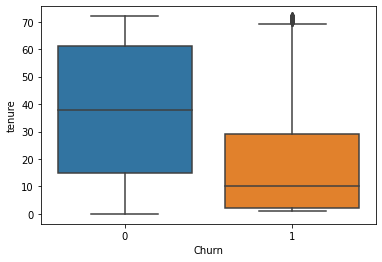

In [25]:
sns.boxplot(y=train['tenure'],x=train['Churn']);
#longer tenure means less churn

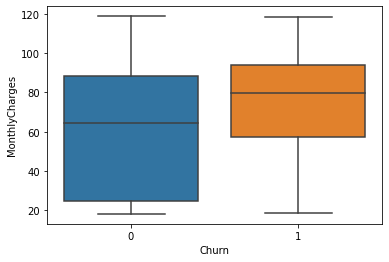

In [28]:
sns.boxplot(y=train['MonthlyCharges'],x=train['Churn']);
#higher monthly charges has a higher churn rate

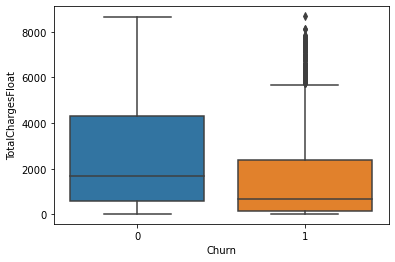

In [68]:
sns.boxplot(y=train['TotalChargesFloat'],x=train['Churn']);
#higher total charges means less churn

In [44]:
def compute_purchase_rate_at_tenure_thresholds(df,min_pct=0, max_pct=100):
    tenures = []
    # iterate through different percentages of income between 80 and 95 percent
    for i in range(min_pct,max_pct,3):
        tenure = df['tenure'].quantile(i*.01)
        if tenure in tenures:
            continue
        else:
            tenures.append(tenure)
        mask = df['tenure']>=tenure
        print('tenure above '+str(int(tenure))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [45]:
compute_purchase_rate_at_tenure_thresholds(train)

tenure above 0 0.27% of customers churned, 6339 in total
tenure above 1 0.27% of customers churned, 6330 in total
tenure above 2 0.23% of customers churned, 5770 in total
tenure above 3 0.22% of customers churned, 5551 in total
tenure above 5 0.2% of customers churned, 5216 in total
tenure above 6 0.2% of customers churned, 5097 in total
tenure above 8 0.19% of customers churned, 4890 in total
tenure above 10 0.18% of customers churned, 4668 in total
tenure above 12 0.17% of customers churned, 4482 in total
tenure above 14 0.17% of customers churned, 4290 in total
tenure above 17 0.16% of customers churned, 4060 in total
tenure above 19 0.15% of customers churned, 3900 in total
tenure above 22 0.15% of customers churned, 3714 in total
tenure above 24 0.14% of customers churned, 3558 in total
tenure above 27 0.14% of customers churned, 3329 in total
tenure above 30 0.13% of customers churned, 3147 in total
tenure above 33 0.13% of customers churned, 2964 in total
tenure above 36 0.12% o

In [46]:
def compute_purchase_rate_at_charge_thresholds(df,min_pct=0, max_pct=100):
    charges = []
    # iterate through different percentages of income between 80 and 95 percent
    for i in range(min_pct,max_pct,3):
        charge = df['MonthlyCharges'].quantile(i*.01)
        if charge in charges:
            continue
        else:
            charges.append(charge)
        mask = df['MonthlyCharges']>=charge
        print('Monthly charges above '+str(int(charge))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [38]:
compute_purchase_rate_at_charge_thresholds(train)

Monthly charges above 18 0.27% of customers churned, 6339 in total
Monthly charges above 19 0.27% of customers churned, 6152 in total
Monthly charges above 19 0.28% of customers churned, 5981 in total
Monthly charges above 20 0.28% of customers churned, 5792 in total
Monthly charges above 20 0.29% of customers churned, 5595 in total
Monthly charges above 20 0.3% of customers churned, 5393 in total
Monthly charges above 24 0.3% of customers churned, 5201 in total
Monthly charges above 25 0.31% of customers churned, 5012 in total
Monthly charges above 30 0.32% of customers churned, 4820 in total
Monthly charges above 41 0.32% of customers churned, 4627 in total
Monthly charges above 45 0.32% of customers churned, 4440 in total
Monthly charges above 50 0.32% of customers churned, 4247 in total
Monthly charges above 54 0.32% of customers churned, 4059 in total
Monthly charges above 56 0.33% of customers churned, 3867 in total
Monthly charges above 60 0.34% of customers churned, 3677 in tot

In [79]:
def compute_purchase_rate_at_totalcharges_thresholds(df,min_pct=0, max_pct=100):
    charges = []
    # iterate through different percentages of income between 80 and 95 percent
    for i in range(min_pct,max_pct,3):
        charge = df['TotalChargesFloat'].quantile(i*.01)
        if charge in charges:
            continue
        else:
            charges.append(charge)
        mask = df['TotalChargesFloat']>=charge
        print('Total charges above '+str(int(charge))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [80]:
compute_purchase_rate_at_totalcharges_thresholds(train)

Total charges above 18 0.27% of customers churned, 6330 in total
Total charges above 31 0.26% of customers churned, 6140 in total
Total charges above 55 0.26% of customers churned, 5951 in total
Total charges above 76 0.24% of customers churned, 5760 in total
Total charges above 106 0.23% of customers churned, 5570 in total
Total charges above 162 0.22% of customers churned, 5380 in total
Total charges above 225 0.22% of customers churned, 5190 in total
Total charges above 294 0.21% of customers churned, 5000 in total
Total charges above 369 0.21% of customers churned, 4811 in total
Total charges above 460 0.21% of customers churned, 4621 in total
Total charges above 551 0.2% of customers churned, 4431 in total
Total charges above 664 0.2% of customers churned, 4241 in total
Total charges above 786 0.2% of customers churned, 4051 in total
Total charges above 908 0.19% of customers churned, 3861 in total
Total charges above 1034 0.19% of customers churned, 3671 in total
Total charges ab

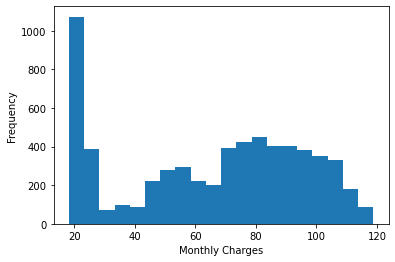

In [74]:
train.MonthlyCharges.plot(kind='hist', bins=20);
plt.xlabel('Monthly Charges');
plt.ylabel('Frequency');

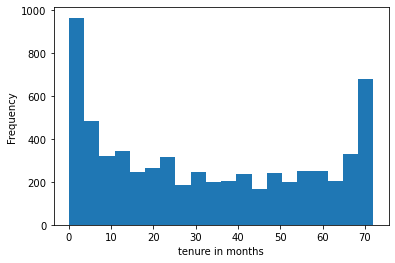

In [77]:
train.tenure.plot(kind='hist', bins=20);
plt.xlabel('tenure in months');
plt.ylabel('Frequency');

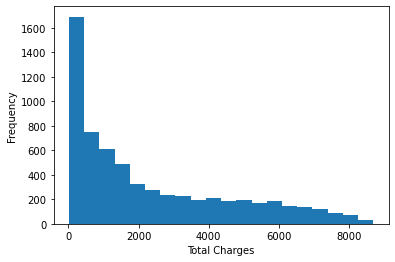

In [78]:
train.TotalChargesFloat.plot(kind='hist', bins=20);
plt.xlabel('Total Charges');
plt.ylabel('Frequency');

In [85]:
train.groupby(['SeniorCitizen','Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

mean  count
SeniorCitizen Contract       PaymentMethod                             
0             Month-to-month Bank transfer (automatic)  0.318501    427
                             Credit card (automatic)    0.302799    393
                             Electronic check           0.517300   1185
                             Mailed check               0.291781    730
              One year       Bank transfer (automatic)  0.105611    303
                             Credit card (automatic)    0.091195    318
                             Electronic check           0.180723    249
                             Mailed check               0.068493    292
              Two year       Bank transfer (automatic)  0.034934    458
                             Credit card (automatic)    0.019108    471
                             Electronic check           0.086331    139
                             Mailed check               0.005848    342
1             Month-to-month Bank transfer (automatic)  0.441176    102
                             Credit card (automatic)    0.428571     98
                             Electronic check           0.595699    465
                             Mailed check               0.621212     66
              One year       Bank transfer (automatic)  0.065574     61
                             Credit card (automatic)    0.179487     39
                             Electronic check           0.218182     55
                             Mailed check               0.153846     13
              Two year       Bank transfer (automatic)  0.054545     55
                             Credit card (automatic)    0.037037     54
                             Electronic check           0.000000     17
                             Mailed check               0.000000      7

In [ ]:
Final Feature Set: all tenure types, scaled Monthly Charges, scaled Total Charges, 
    Number of Services, Senior Citizen, Month to Month, Electronic Check, 
    Paperless Billing, FiberOptic, Online Security, Tech Support, Partners, Dependents

In [ ]:
# but let's just use the features we derived

    

def add_features_for_training(df):

    # affluence + experience traveling
    mask = (df['AnnualIncome']>=1350000)&(
        (df['EverTravelledAbroad']=='Yes')|(df['FrequentFlyer']=='Yes'))&(
    (df['ChronicDiseases']==0)|(df['AnnualIncome']<1700000)|(df['GraduateOrNot']=='Yes'))
    df = add_feature_column(df, col='high_inc_travel_exp',mask=mask)
   
    # 5% percentile income
    mask = (df['AnnualIncome']<=400000)&(df['Age']<33)
    df = add_feature_column(df, col='low_inc',mask=mask)
    
    # govt job + travel
    mask = (df['Employment Type']=='Government Sector')&(
        (df['EverTravelledAbroad']=='Yes')|(df['FrequentFlyer']=='Yes'))
    df = add_feature_column(df, col='gov_abroad_or_flyer',mask=mask)
    
    # non govt job + travel
    mask = (df['Employment Type']=='Private Sector/Self Employed')&(
        (df['EverTravelledAbroad']=='Yes')|(df['FrequentFlyer']=='Yes'))&(
        df['GraduateOrNot']=='Yes')
    df = add_feature_column(df, col='corp_abroad_or_flyer',mask=mask)

    # goverment workers without a degree
    mask = (df['Employment Type']=='Government Sector')&(df['GraduateOrNot']=='No')
    df = add_feature_column(df, col='gov_no_deg',mask=mask)

    # older people with large families
    mask = (df['Age']>=33)&(df['FamilyMembers']>=6)
    df = add_feature_column(df, col='lg_fam_older',mask=mask)
    
    # more mature non college
    mask = (df['GraduateOrNot']=='No')&(df['Age']>=28)
    df = add_feature_column(df, col='mature_non_college',mask=mask)
    
    # max family
    mask = (df['FamilyMembers']==9)
    df = add_feature_column(df, col='max_family_size',mask=mask)
    
    return df



In [130]:

def add_feature_column(df, col, mask):
    df.loc[df[mask].index,col]=1
    df[col].fillna(0,inplace=True)
    return df

In [141]:
def add_features_for_training(df):

    # tenure 0-1
    mask = (df['Tenure0-1year']==1)
    df = add_feature_column(df, col='FTenure0-1year',mask=mask)
    
    # tenure 1-2
    mask = (df['Tenure1-2year']==1)
    df = add_feature_column(df, col='FTenure1-2year',mask=mask)
    
    # tenure 2-3
    mask = (df['Tenure2-3year']==1)
    df = add_feature_column(df, col='FTenure2-3year',mask=mask)
    
    # tenure 3-4
    mask = (df['Tenure3-4year']==1)
    df = add_feature_column(df, col='FTenure3-4year',mask=mask)
    
    # tenure 4-5
    mask = (df['Tenure4-5year']==1)
    df = add_feature_column(df, col='FTenure4-5year',mask=mask)
    
    # tenure 5-6
    mask = (df['Tenure5-6year']==1)
    df = add_feature_column(df, col='FTenure5-6year',mask=mask)
    
    

    # Senior Citizen
    mask = (df['SeniorCitizen']==1)
    df = add_feature_column(df, col='FSeniorCitizen',mask=mask)
    
    # Contract = Month to Month
    mask = (df['MonthToMonth']==1)
    df = add_feature_column(df, col='FMonthToMonth',mask=mask)
    
    # Payment Method = Electronic Check
    mask = (df['ElectronicCheck']==1)
    df = add_feature_column(df, col='FElectronicCheck',mask=mask)
    
    # Paperless Billing
    mask = (df['PaperlessBilling']==1)
    df = add_feature_column(df, col='FPaperlessBilling',mask=mask)
    
    # Internet Service = Fiber optic
    mask = (df['FiberOptic']==1)
    df = add_feature_column(df, col='FFiberOptic',mask=mask)
     
    
    # Online Security
    mask = (df['OnlineSecurity']==1)
    df = add_feature_column(df, col='FOnlineSecurity',mask=mask)
    
    # Tech Support
    mask = (df['TechSupport']==1)
    df = add_feature_column(df, col='FTechSupport',mask=mask)
    
    # Partners
    mask = (df['Partners']==1)
    df = add_feature_column(df, col='FPartners',mask=mask)
    
    
    # Dependents
    mask = (df['Dependents']==1)
    df = add_feature_column(df, col='FDependents',mask=mask)
    
    
    # Monthly Charges
    # Total Charges
    # Number of Services
  
    return df

In [140]:
#Final Feature Set: all tenure types, scaled Monthly Charges, scaled Total Charges, 
#    Number of Services, Senior Citizen, Month to Month, Electronic Check, 
#    Paperless Billing, FiberOptic, Online Security, Tech Support, Partners, Dependents

train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceBinary,PhoneServiceBinary,OnlineSecurityBinary,OnlineBackupBinary,DeviceProtectionBinary,TechSupportBinary,StreamingTVBinary,StreamingMoviesBinary,NumberOfServices,TotalChargesFloat,Tenure0-1year,Tenure1-2year,Tenure2-3year,Tenure3-4year,Tenure4-5year,Tenure5-6year,MonthlyChargesScaled,TotalChargesScaled,MonthToMonth,FiberOptic,ElectronicCheck
947,9904-EHEVJ,0,1,1,1,32,1,1,Fiber optic,0,0,1,0,1,0,Month-to-month,1,Mailed check,91.35,2896.55,0,1,1,0,0,1,0,1,0,4,2896.55,0,0,1,0,0,0,0.883733,0.266009,1,1,0
15,3655-SNQYZ,0,0,1,1,69,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),113.25,7895.15,0,1,1,1,1,1,1,1,1,8,7895.15,0,0,0,0,0,1,1.610601,2.466644,0,1,0
5851,4118-CEVPF,0,1,0,0,35,1,1,Fiber optic,1,1,1,1,1,1,One year,1,Bank transfer (automatic),110.80,3836.3,0,1,1,1,1,1,1,1,1,8,3836.30,0,0,1,0,0,0,1.529285,0.679734,0,1,0
4798,4948-WBBKL,0,1,0,0,36,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.90,2659.45,0,1,1,0,0,0,0,0,0,2,2659.45,0,0,1,0,0,0,0.337753,0.161626,1,1,0
3425,0369-ZGOVK,0,0,1,1,28,1,0,Fiber optic,0,0,0,0,0,0,One year,1,Bank transfer (automatic),70.40,1992.2,0,1,1,0,0,0,0,0,0,2,1992.20,0,0,1,0,0,0,0.188396,-0.132131,0,1,0


In [145]:
trainfeatures = add_features_for_training(train)

In [ ]:
train = churn.sample(frac=.9)
mask = ~churn.index.isin(train.index)
test = churn[mask].copy()
print(train.shape[0],test.shape[0])